In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
import sklearn 

#### Create new dataset with all the original variables, as well as 'chi_label' and 'diff.'

In [2]:
data = np.genfromtxt("../../data/data.dat")
data = np.delete(data, 0, 0)
df = pd.DataFrame(data, columns = ['ustat','alph1','alph2', 'beta', 'chi'])
df.head()

,ustat,alph1,alph2,beta,chi
0,8.408213,2.344511,2.344511,60.0,1.094479
1,7.006844,2.344511,2.344511,60.0,0.840347
2,5.255133,2.344511,2.344511,60.0,0.772829
3,3.503422,2.344511,2.344511,60.0,0.811944
4,2.102053,2.344511,2.344511,60.0,0.844523


In [3]:
df = df.loc[df['ustat'] >= 5.26]
df = df.loc[df['ustat'] < 12.60]

In [4]:
df = df.reset_index(drop=True)
df.head()

,ustat,alph1,alph2,beta,chi
0,8.408213,2.344511,2.344511,60.0,1.094479
1,7.006844,2.344511,2.344511,60.0,0.840347
2,10.833991,2.276779,2.276779,60.0,1.168432
3,8.667192,2.276779,2.276779,60.0,0.882475
4,7.222660,2.276779,2.276779,60.0,0.837454


In [5]:
# diff = |alph1 - alph2|
diff = []

for i in range(len(df['alph1'])):
    diff.append(abs(df['alph1'][i] - df['alph2'][i]))
    
df['diff'] = diff

In [6]:
# CHI

# small chi = 0
# large chi = 1
labels = []
for i in df['chi']:
    if i < 3:
        labels.append(0)
    else:
        labels.append(1)
        
df['chi_label'] = labels

In [24]:
df.head()

,ustat,alph1,alph2,beta,chi,diff,chi_label
0,8.408213,2.344511,2.344511,60.0,1.094479,0.0,0
1,7.006844,2.344511,2.344511,60.0,0.840347,0.0,0
2,10.833991,2.276779,2.276779,60.0,1.168432,0.0,0
3,8.667192,2.276779,2.276779,60.0,0.882475,0.0,0
4,7.222660,2.276779,2.276779,60.0,0.837454,0.0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ustat      128 non-null    float64
 1   alph1      128 non-null    float64
 2   alph2      128 non-null    float64
 3   beta       128 non-null    float64
 4   chi        128 non-null    float64
 5   diff       128 non-null    float64
 6   chi_label  128 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 7.1 KB


In [8]:
# df.to_csv("../../data/processed/week04_overlap_data.csv", index = False)

In [9]:
colors = ['red', 'blue']

We will only be looking at the overlapped region between ustat >= 5.26 and ustat < 12.60.. The issue we are currently facing is that we cannot find an easy way to determine 'large chi' and 'small chi' solely based on looking at this region. Thus, we have to explore the other relationships between variables and potentially create new groups. It's essentially a new dataset and new classification problem.

<AxesSubplot:xlabel='ustat', ylabel='chi'>

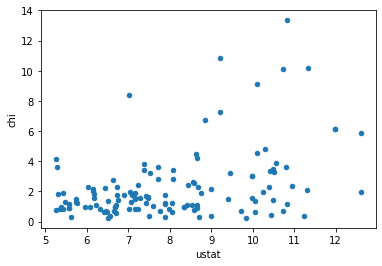

In [10]:
df.plot.scatter(x='ustat', y='chi')